## Unsupervised Learning Example: European Working Conditions Survey (2016) 

Attributes

Q87a - I have felt cheerful and in good spirits [...which is the closest to how you have been feeling over the last two weeks]

Q87b - I have felt calm and relaxed [...which is the closest to how you have been feeling over the last two weeks]

Q87c - I have felt active and vigorous [...which is the closest to how you have been feeling over the last two weeks]

Q87d - I woke up feeling fresh and rested [...which is the closest to how you have been feeling over the last two weeks]

Q87e - My daily life has been filled with things that interest me [...which is the closest to how you have been feeling over the last two weeks]

Values for variables Q87a to Q87e

1. All of the time.
2. Most of the time
3. More than half of the time
4. Less than half of the time
5. Some of the time
6. At no time

Q90a - At my work I feel full of energy [Please tell me how often you feel this way...]

Q90b - I am enthusiastic about my job [Please tell me how often you feel this way...]

Q90c - Time flies when I am working [Please tell me how often you feel this way...]

Q90f - In my opinion, I am good at my job [Please tell me how often you feel this way...]

Values for variables Q90a to Q90f

1. Always.
2. Most of the time
3. Sometimes
4. Rarely
5. Never

Objective: To find the variables affecting Q90f: job satisfaction rate

## Data Prep

In [1]:
#### Libraries ####
# import libraries
library(ggplot2) # visuals
library(GGally) 
library(ISLR) # PCA
library(tidyverse) # data wrangling
library(ggfortify) # PCA visuals
library(factoextra) # PCA visuals
library(FactoMineR)
library(cluster)
library(dplyr)
library(magrittr) 

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'GGally' was built under R version 3.6.2"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
"package 'ISLR' was built under R version 3.6.2"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.3     
Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was b

In [4]:
#load ewcs
ewcs=read.table("ewcs2016.csv",sep=",",header=TRUE)
ewcs[,][ewcs[, ,] == -999] = NA
kk=complete.cases(ewcs)
ewcs=ewcs[kk,] # 7647 obs 11 features
sample = ewcs[, 3:11] # exclude Q2a gender and Q2b age
scaled.ewcs = scale(ewcs) # scale for kmeans and pca

In [5]:
# number of males and females
ewcs %>% count(Q2a, sort = TRUE)

Q2a,n
1,3899
2,3748


Gender is ~ balanced. 

## Data visualisation

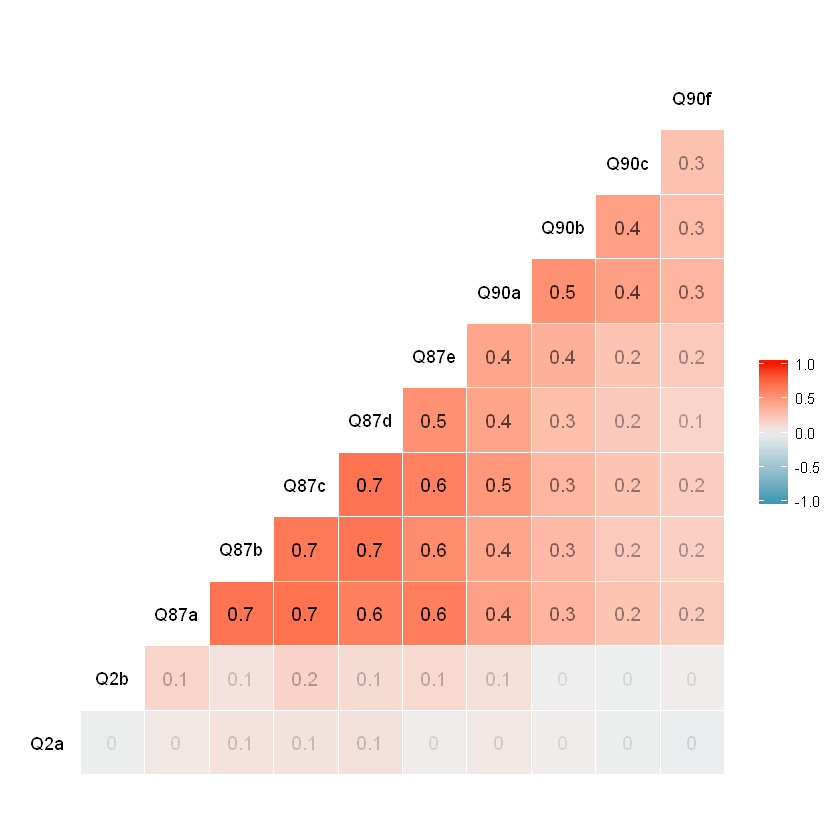

In [6]:
# correlation plot 
ggcorr(scaled.ewcs, 
       label = TRUE, 
       label_alpha = TRUE)

Questions on an individual's personal well-being do play a part in his/her ability to perform in their roles/job? (Specifically Q87 branches do have interconenctedness)

If an individual who is generally positive will have a positive outlook on his or her job satisfaction rate.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

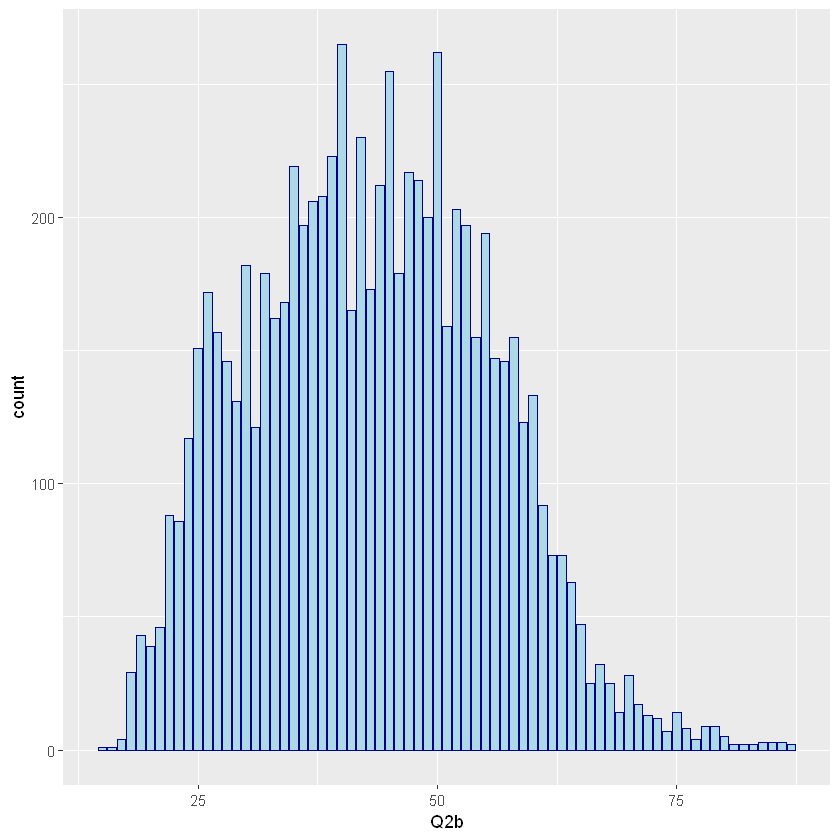

In [7]:
# distribution of age plot
ggplot(ewcs, aes(x=Q2b)) + 
  geom_histogram(stat="count", color="darkblue", fill="lightblue")

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

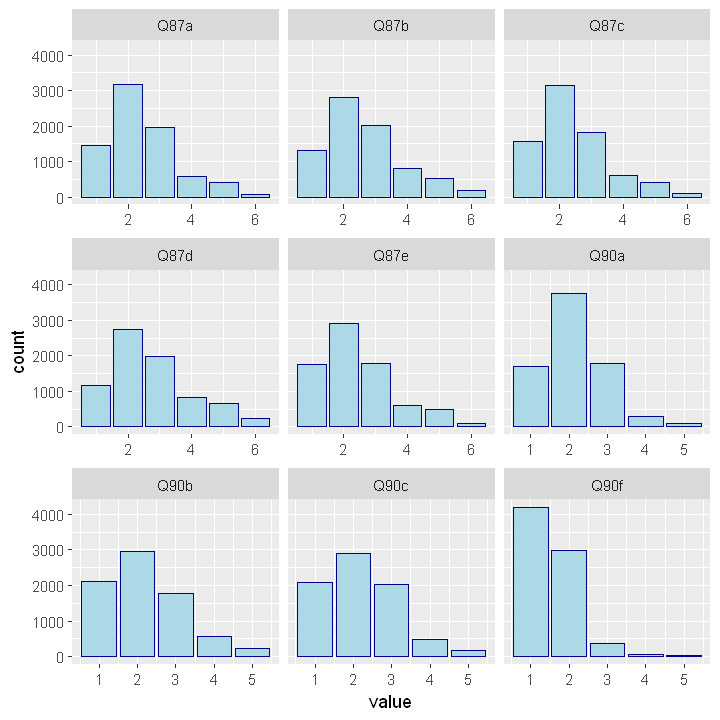

In [10]:
# Responses for questionnaire
options(repr.plot.width=6, repr.plot.height=6)
ggplot(gather(ewcs[, 3:11]), aes(value)) + 
  geom_histogram(stat="count",color="darkblue", fill="lightblue")+
  facet_wrap(~key, scales = 'free_x')

Job outlook (Q90a, b, c, f):

Responses are mostly “2. Most of the time” except for Q90f. 
More individuals answered “Q90f: In my opinion, I am good at my job” with “1. Always”. Individuals appear to be confident in their roles at their workplaces. 

# PCA

It is a dimension reducing method that transforms a data set with a large number of variables into smaller ones which capture the most information of the data by finding new vectors that significantly explain the amount of variance. 

A larger variance is due to a larger dispersion of the observations. The principal component is the normalised linear combination of all 11 questions. The attached weight to each question is known as the loading. 

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0985 1.1874 1.01058 0.97061 0.88319 0.74969 0.71299
Proportion of Variance 0.4003 0.1282 0.09284 0.08564 0.07091 0.05109 0.04621
Cumulative Proportion  0.4003 0.5285 0.62133 0.70697 0.77788 0.82898 0.87519
                           PC8     PC9    PC10    PC11
Standard deviation     0.65201 0.59566 0.56499 0.52321
Proportion of Variance 0.03865 0.03226 0.02902 0.02489
Cumulative Proportion  0.91384 0.94609 0.97511 1.00000

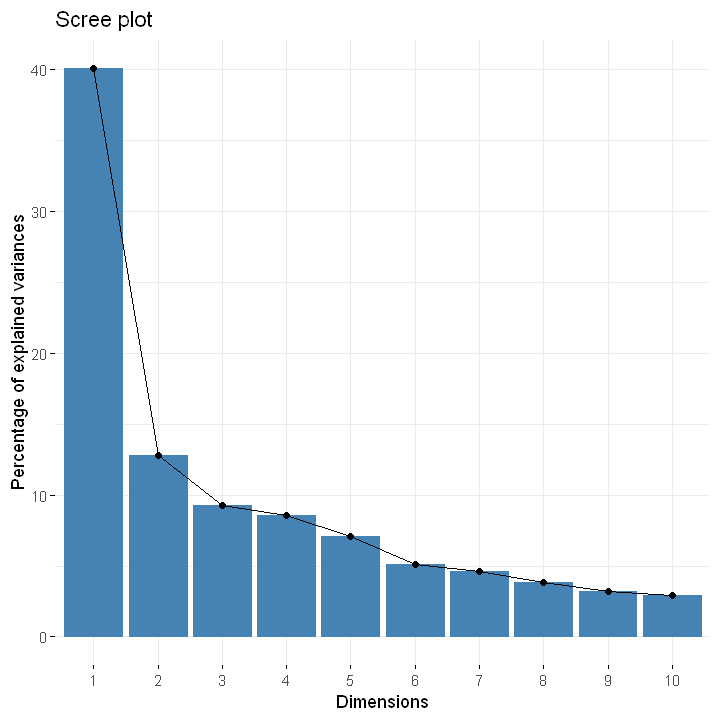

In [15]:
# PCA on Q87 and Q90 questions, data set = sample
prin.comp = prcomp(scaled.ewcs, scale=T) 
summary(prin.comp) # first two pc capture 63% of the variance
fviz_eig(prin.comp) # scree plot to show the % of variances explained

In [25]:
# how about PCA on the entire dataset
pc.entire = prcomp(scaled.ewcs)
summary(pc.entire) #total variance capturd by PC 1 & 2: 0.5285, not as good as the initial

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0985 1.1874 1.01058 0.97061 0.88319 0.74969 0.71299
Proportion of Variance 0.4003 0.1282 0.09284 0.08564 0.07091 0.05109 0.04621
Cumulative Proportion  0.4003 0.5285 0.62133 0.70697 0.77788 0.82898 0.87519
                           PC8     PC9    PC10    PC11
Standard deviation     0.65201 0.59566 0.56499 0.52321
Proportion of Variance 0.03865 0.03226 0.02902 0.02489
Cumulative Proportion  0.91384 0.94609 0.97511 1.00000

In [17]:
# PCA matrix to get the loadings
pca.mat = function(loading, comp.sdev){
  loading*comp.sdev
}

# define the loading and standard deviation
loading = prin.comp$rotation
comp.sdev = prin.comp$sdev

# Principal components variables
pc.var = t(apply(loading, 1, pca.mat, comp.sdev)) # apply the function with the loading and std dev

pc.var[,1:2] # display the PCA matrix, PC1 & PC2

,PC1,PC2
Q2a,0.0672335,-0.1646078
Q2b,0.1605784,-0.2617582
Q87a,0.8205699,-0.2370005
Q87b,0.7923579,-0.2801683
Q87c,0.8320814,-0.2441813
Q87d,0.7793864,-0.3009077
Q87e,0.7609715,-0.1495462
Q90a,0.7089614,0.3571430
Q90b,0.5767616,0.5267994
Q90c,0.4692794,0.5982987


*Guideline:* 

(> 0.75) is considered as “strong”, the values range from 0.50-0.75 (0.50 ≥ factor loading ≥ 0.75) is considered as “moderate”, and the values range from 0.30-0.49 (0.30 ≥ factor loading ≥ 0.49) is considered as “weak” factor loadings.

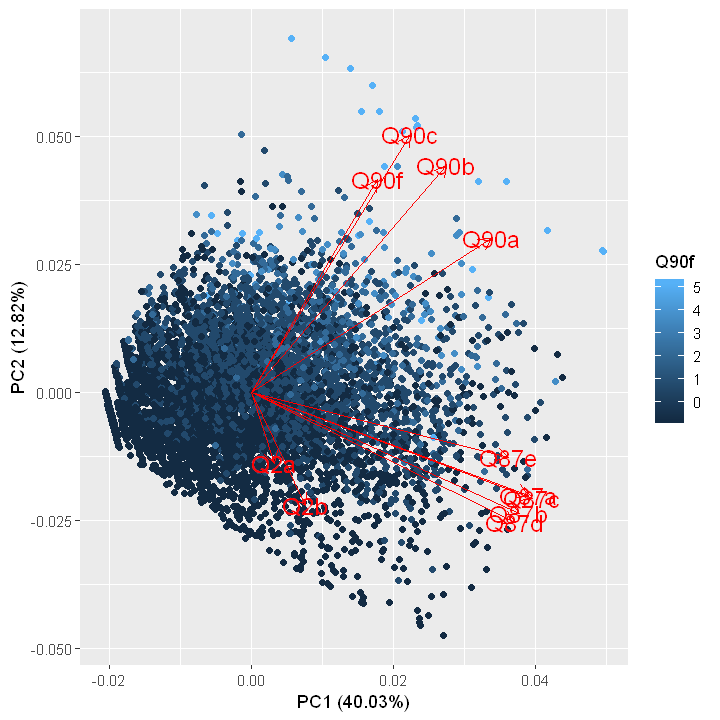

In [18]:
# PLot PCA biplot
autoplot(prin.comp, colour ='Q90f', loadings = TRUE, # colour fill based on largest loadings contribution
         loadings.label = TRUE, loadings.label.size = 5)

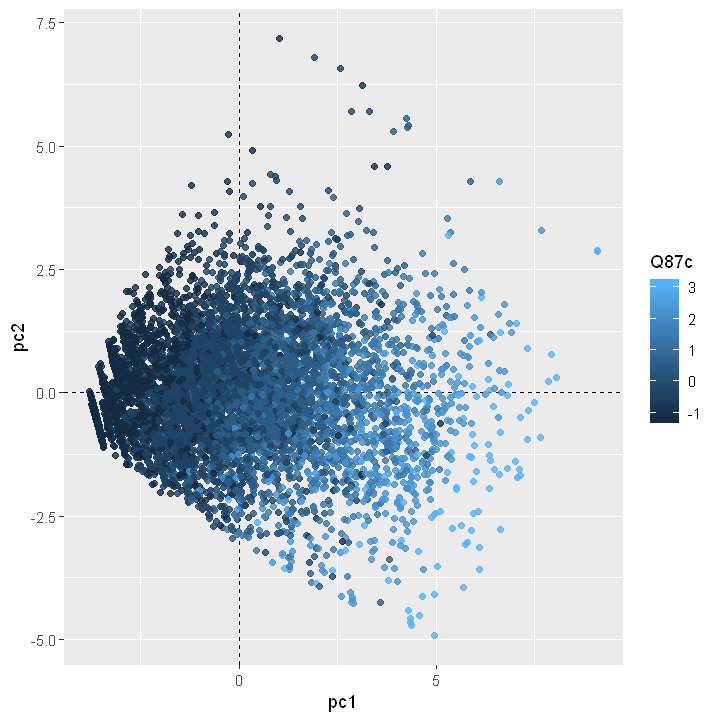

In [19]:
# PC1 and PC2 plot without vectors
pc1 = summary(prin.comp)$x[,1] # PC1
pc2 = summary(prin.comp)$x[,2] # PC2
# plot
ggplot(data=scaled.ewcs, aes(x=pc1, y=pc2, colour=Q87c))+
      geom_hline(yintercept = 0, lty = 2) +
      geom_vline(xintercept = 0, lty = 2) +
      geom_point(alpha = 0.8)

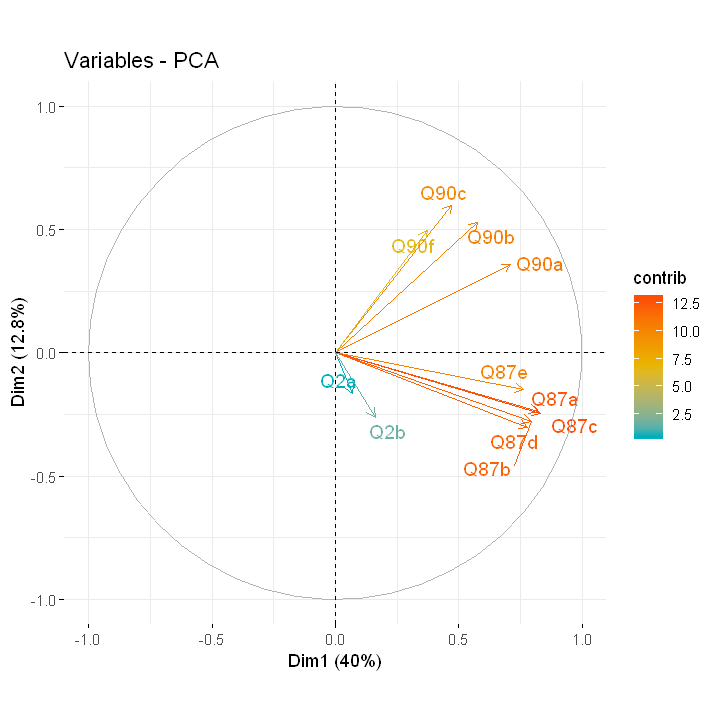

In [21]:
# Another way to represent the vectors
fviz_pca_var(prin.comp,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

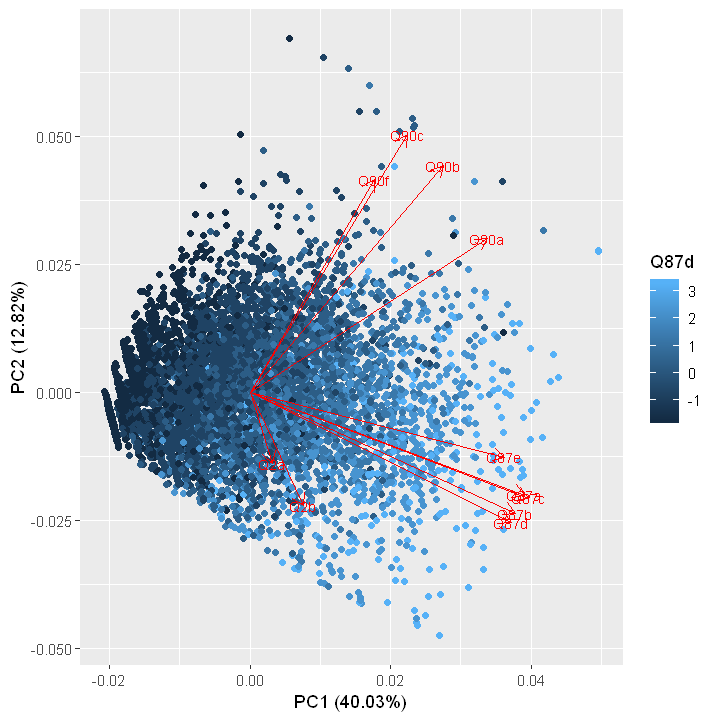

In [138]:
autoplot(pc.entire, colour ='Q87d', loadings = TRUE,
         loadings.label = TRUE, loadings.label.size = 3)

The first two principal components (PC1 and PC2) explain ~ 63% of the variation. 

Questions 87 (Q87a, b, c, d, e) have the highest loadings in PC1. Questions 87 vectors significantly explain the dispersion of observations based on Question 90f responses.  Categorical responses of ‘1. Always’ and ‘2. Most of the time’ are observed to be densely packed as opposed to the negative responses (5 and 6) having wider dispersion.    

Do the responses of general well-being indicate better job satisfaction?

Questions 87 vectors are in the same direction as the dispersion of responses (1 and 2). If an individual were to respond positively on Q87s, Q90f would be answered positively as well. 


# K means

The algorithm seeks to find different clusters, K, based on how far apart the clusters’ centres (means) are from one another. The K-means algorithm:

1.	Choose the number of clusters desired, K
2.	Randomly make K guesses on where the clusters are
3.	For each observation, assign it to the closest cluster
4.	The centre of each cluster will be adjusted to be in the middle of the assigned observations.

Steps 3 and 4 are iterated until little to no changes are made to the clusters’ centres.


In [28]:
set.seed(2020)
k.max = 20 # max number of clusters

# weighted sum of squares
wss = sapply(1:k.max, function(k){
  kmeans(scaled.ewcs, k, iter.max=15)$tot.withinss}
  )

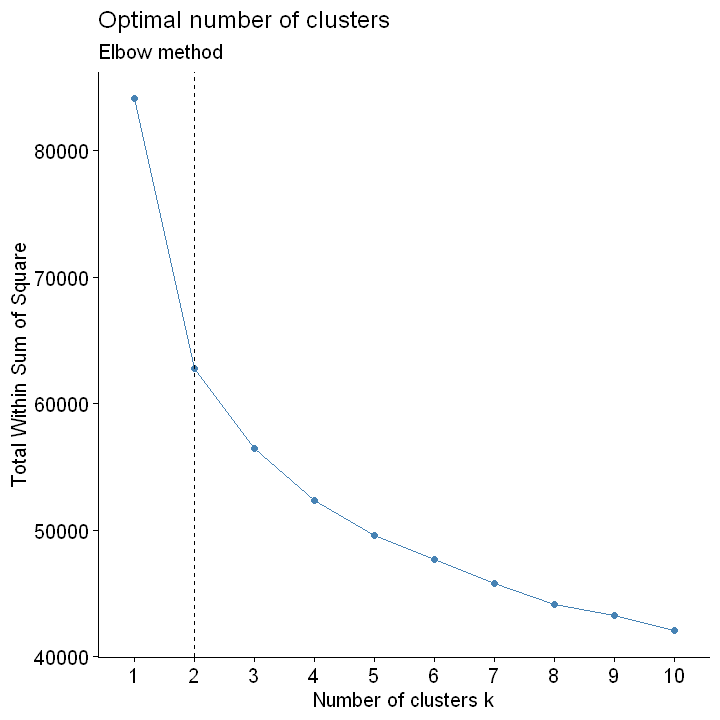

In [36]:
# elbow method to get the optimal clusters (k=2) 
fviz_nbclust(scaled.ewcs, kmeans, method = "wss") +
      geom_vline(xintercept = 2, linetype = 2)+
      labs(subtitle = "Elbow method")

In [31]:
# based on optimal clusters, run kmeans
k1 = kmeans(scaled.ewcs, centers = 2, nstart=20) #  2 clusters based on optimality

# number of obs in clusters
k1.clusters = k1$cluster
table(k1.clusters) # 4869 in first cluster, 2778 in second

k1.clusters
   1    2 
4869 2778 

In [32]:
# mean of all variables in the clusters
sub.group = k1.clusters
ewcs %>%
  mutate(Cluster = sub.group) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

Cluster,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
1,1.470733,41.85048,1.879852,2.019511,1.836722,2.102074,1.862806,1.776956,1.852742,1.908811,1.384062
2,1.524118,45.45572,3.383729,3.634269,3.428726,3.795536,3.362491,2.738661,2.792297,2.642549,1.787257


The two clusters are split based on ‘Neutral-negative’ (cluster 1) and ‘Positive’ (cluster 2) responses. 

Despite the neutral or negative responses, individuals still acknowledge their abilities to perform in their workplaces (Mean response for Q90f is between 1.38 to 1.78). Age (Q2a) and gender (Q2b) are not significant as they are similar in both clusters.

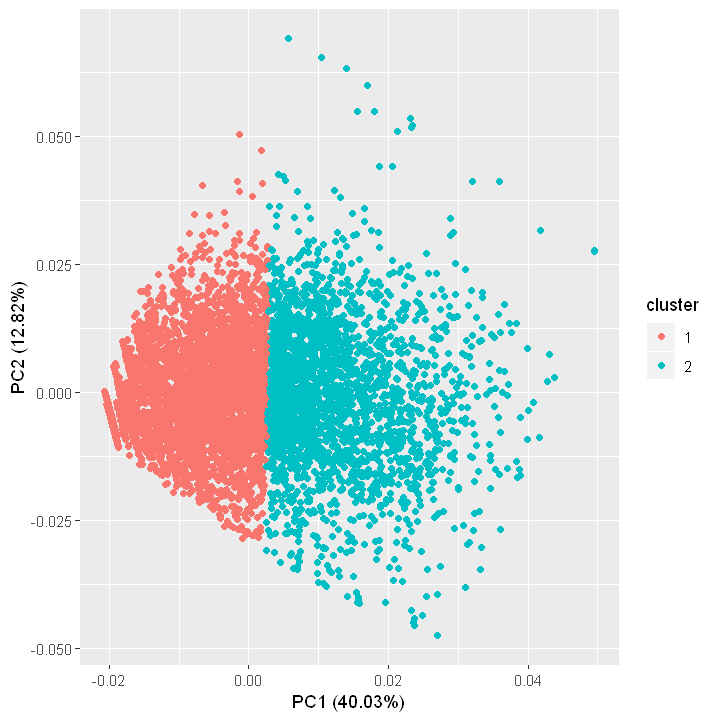

In [35]:
# K means plot to show both clusters
autoplot(k1, data=scaled.ewcs)

Chi square test for differences between these two clusters

In [34]:
# cluster 1 and 2 results
k1results = data.frame(ewcs$Q2a, ewcs$Q2b, ewcs$Q87a,ewcs$Q87b, ewcs$Q87c, ewcs$Q87d, ewcs$Q87e,
                        ewcs$Q90a, ewcs$Q90b, ewcs$Q90c, ewcs$Q90f, k1$cluster)

cluster1 = subset(k1results, k1$cluster==1)
cluster2 = subset(k1results, k1$cluster==2)

# Based on the significance 
M = as.matrix(table(cluster1$ewcs.Q90f))
p.null = as.vector(prop.table(table(cluster2$ewcs.Q90f)))
chisq.test(M, p=p.null) # at 5% sig, p value is less than 0.05; significant


	Chi-squared test for given probabilities

data:  M
X-squared = 1653, df = 4, p-value < 2.2e-16


P-value < 0.05, Ho is rejected with Q90f being similar in both clusters separately. 

# Hierarchical Clustering

The algorithm groups similar objects into clusters. Each point and cluster are separated based on the distance between each point. Two distance measures are used; (1) Pearson correlation distance and (2) Euclidean distance. 

In [37]:
dd.pear = as.dist(1 - cor(scaled.ewcs)) # pearson distance

dd.eu = dist(scaled.ewcs) # euclidean distance

In [38]:
# hierarchical clustering based on pearson distance
hc.comp = hclust(dd.pear, method = "complete") 
hc.avg = hclust(dd.pear, method = "average")
hc.sg = hclust(dd.pear, method = "single")

# HC on euclidean distance
hc.comp.eu = hclust(dd.eu, method = "complete")
hc.avg.eu = hclust(dd.eu, method = "average")
hc.sg.eu = hclust(dd.eu, method = "single")

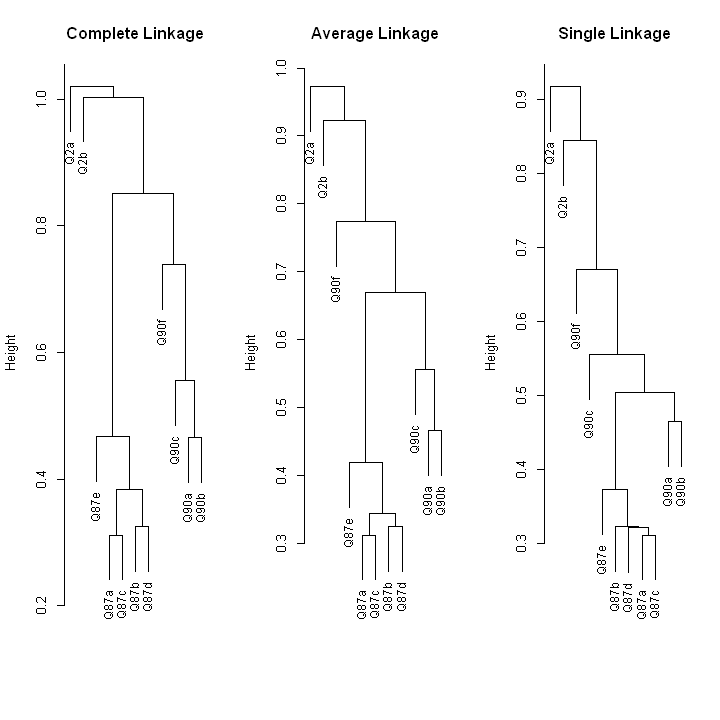

In [39]:
# plots for pearson distance
par(mfrow = c(1, 3))
plot(hc.comp, main = "Complete Linkage", xlab = "", sub = "", cex = 0.9)
plot(hc.avg, main = "Average Linkage", xlab = "", sub = "", cex = 0.9)
plot(hc.sg, main = "Single Linkage", xlab = "", sub = "", cex = 0.9)

In [40]:
# getting the cluster means for the variables
sub.group = cutree(hc.comp.eu, 2)
ewcs %>%
  mutate(Cluster = sub.group) %>%
  group_by(Cluster) %>%
  summarise_all("mean") # mean of all variables in the cluster

Cluster,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
1,1.527869,45.78525,3.904098,4.180328,3.961475,4.375410,3.806557,2.918033,3.018852,2.700820,1.854098
2,1.482963,42.66190,2.145636,2.307297,2.121519,2.402521,2.142057,1.976039,2.037498,2.075618,1.469115


Chi sq test for both clusters to ensure that the results are the same as K-Means

In [41]:
# test if both clusters are similar based on Q90f
# cluster 1 and 2 results
hc.results = data.frame(ewcs$Q2a, ewcs$Q2b, ewcs$Q87a,ewcs$Q87b, ewcs$Q87c, ewcs$Q87d, ewcs$Q87e,
                       ewcs$Q90a, ewcs$Q90b, ewcs$Q90c, ewcs$Q90f, cutree(hc.comp.eu, 2))

hc.cluster1 = subset(hc.results, cutree(hc.comp.eu, 2)==1)
hc.cluster2 = subset(hc.results, cutree(hc.comp.eu, 2)==2)

# Chi square test to test if both clusters are independent
M = as.matrix(table(hc.cluster1$ewcs.Q90f))
p.null = as.vector(prop.table(table(cluster2$ewcs.Q90f)))
chisq.test(M, p=p.null)


	Chi-squared test for given probabilities

data:  M
X-squared = 67.235, df = 4, p-value = 8.699e-14


Respondents are confident in their respective roles (Q90f) despite the varying responses in emotional well-being questions. Positive and neutral-negative responses translate to confidence in work performance. Confidence in work abilities (Q90f) is not exclusively due to positive emotional well-being responses. 